## Цель работы
 Изучение связи между признаками двумерного набора данных, визуализация данных.
## Вариант
Содержит информацию о зарплатах.
1
Год выплаты заработной платы (целое число)
2
Тип работы (PT - Part-time, FT - Full-time, FL - Freelance)
3
Должность
4
Зарплата за год (целое число)
5
Зарплата в долларах (целое число)
6
Страна проживания
7
Страна главного офиса
8
Среднее кол-во людей в компании (S - менее 50
сотрудников (малая), M от 50 до 250 сотрудников (средняя), L - более 250 сотрудников (крупная))
9 
Общий опыт работы
10
Опыт на последней работе

**Задание 1: Использовать seaborn.** По группировке - **work_year** и количество компаний по различному типу занятости (**employment_type**) построить диаграмму.

**Задание 2: Использовать pandas и plot.** По сводной таблице (pivot_table) - отобразить среднюю зарплату в usd по локациям (**company_location**). Сделать линию зелёной, шириной 4 и отобразить маркеры в виде *.

**Задание 3: Использовать matplotlib.** Построить круговую диаграмму, которая отображает процент количества записей по каждому году.


## Ход работы

Выполняется подготовка к лабораторной работе. В качестве файла используем salary2. После выводим 20 строк из файла для ознакомления с данными.

In [25]:
import pandas as pd
df = pd.read_csv('salary2.csv', sep=';')

df.head(n=20)

,work_year,employment_type,job_title,salary,salary_in_usd,employee_residence,company_location,company_size,exp_all,exp
0,2020.0,FT,Data SCIENTIST,70000.0,79833.0,DE,DE,L,9,4
1,2020.0,FT,Product Data Analyst,20000.0,20000.0,HN,HN,S,2,2
2,2020.0,FT,Data Analyst,72000.0,72000.0,US,US,L,13,3
3,2020.0,FT,Data Scientist,11000000.0,35735.0,HU,HU,L,60,6
4,2020.0,FT,Data Scientist,45000.0,51321.0,FR,FR,S,8,4
5,2020.0,FT,Data Scientist,3000000.0,40481.0,IN,IN,L,53,1
6,2020.0,FT,Data Scientist,35000.0,39916.0,FR,FR,M,6,2
7,2020.0,FT,Data Analyst,85000.0,85000.0,US,US,L,15,2
8,2020.0,FT,Data Analyst,8000.0,8000.0,PK,PK,Large,1,4
9,2020.0,FT,Data Engineer,4450000.0,41689.0,JP,JP,S,50,5


Данные содержат информацию о зарплатах и работах и содержат поля: год работы, тип работы, название работы, зарплата в у.е. и в долларах, страну проживания работника, страну компании и размер компании. 

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           401 non-null    float64
 1   employment_type     401 non-null    object 
 2   job_title           401 non-null    object 
 3   salary              398 non-null    float64
 4   salary_in_usd       401 non-null    float64
 5   employee_residence  401 non-null    object 
 6   company_location    401 non-null    object 
 7   company_size        401 non-null    object 
 8   exp_all             401 non-null    int64  
 9   exp                 401 non-null    int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 31.5+ KB


Изменяется тип данных для полей work_year, salary_in_usd, salary на int, так как они являются целочисленными. 

In [27]:
df['salary'] = df['salary'].astype(int, errors='ignore')
df['work_year'] = df['work_year'].values.astype(int)
df['salary_in_usd'] = df['salary_in_usd'].values.astype(int)

Описываются числовые столбцы.

In [28]:
df.describe()

,work_year,salary,salary_in_usd,exp_all,exp
count,401.000000,3.980000e+02,401.000000,401.000000,401.000000
mean,2021.528678,2.888336e+05,105895.017456,17.197007,4.486284
std,0.678086,1.677081e+06,58183.664171,11.133445,2.027421
min,2020.000000,4.000000e+03,2859.000000,0.000000,-1.000000
25%,2021.000000,6.700000e+04,65013.000000,10.000000,3.000000
50%,2022.000000,1.091400e+05,100000.000000,15.000000,4.000000
75%,2022.000000,1.500000e+05,140000.000000,22.000000,6.000000
max,2022.000000,3.040000e+07,412000.000000,81.000000,10.000000


Данные корректны, но в столбце salary есть пропуски. Они заменяются на среднее. Заменить столбцы именно на среднее оптиимальнее всего так как в итоге это сильно не скажется на большинстве показателей, в отличие от замены на 0. Также, удалять данные не оптимально, так как уменьшится информации в других столбцах, что потом навредить выводам.

In [29]:
df['salary'] = df['salary'].fillna(df['salary'].mean())

df['salary'] = df['salary'].astype(int)

df['salary'].describe()

count    4.010000e+02
mean     2.888336e+05
std      1.670780e+06
min      4.000000e+03
25%      6.700000e+04
50%      1.092800e+05
75%      1.500750e+05
max      3.040000e+07
Name: salary, dtype: float64

Проводится проверка данных:
1. Некорректные названия столбцов



In [30]:
df.columns

Index(['work_year', 'employment_type', 'job_title', 'salary', 'salary_in_usd',
       'employee_residence', 'company_location', 'company_size', 'exp_all',
       'exp'],
      dtype='object')

Столбцы не содержат пробелов, написаны на одном языке и имеют нижний регистр, однако столбцы exp и exp_all кажутся непонятными. Они заменяются на experience и experience_all соответственно.

In [31]:
df = df.rename(columns={'exp': 'experience', 'exp_all': 'experience_all'})

2. Дубликаты в данных

In [32]:
print(df.duplicated().sum())

0


Явные дубликаты в данных не нашлись.

Находятся неявные дубликаты в данных. Зарплаты проверяться не будут, так как они могут сильно различаться.

In [33]:
print('work_year: ', df['work_year'].unique())
print('employment_type: ', df['employment_type'].unique())
print('job_title: ', df['job_title'].unique())
print('employee_residence: ', df['employee_residence'].unique())
print('company_location: ', df['company_location'].unique())
print('company_size: ', df['company_size'].unique())
print('experience: ', df['experience'].unique())
print('experience_all: ', df['experience_all'].unique())


work_year:  [2020 2021 2022]
employment_type:  ['FT' 'PT' 'FL']
job_title:  ['Data SCIENTIST' 'Product Data Analyst' 'Data Analyst' 'Data Scientist'
 'Data Engineer' 'Machine Learning Manager' 'Data Analytics Engineer'
 'Data Science Engineer' 'Machine Learning Developer'
 'Data Analytics Manager' 'Head of Data Science'
 'Head of Machine Learning' 'NLP Engineer' 'Data Analytics Lead'
 'DataScientist' 'Data AnalyticsManager']
employee_residence:  ['DE' 'HN' 'US' 'HU' 'FR' 'IN' 'PK' 'JP' 'GR' 'MX' 'CA' 'AT' 'NG' 'PH'
 'GB' 'ES' 'IT' 'PL' 'BG' 'NL' 'IQ' 'UA' 'SG' 'RU' 'MT' 'CL' 'RO' 'IR'
 'VN' 'BR' 'HK' 'TR' 'RS' 'AR' 'DZ' 'AU' 'CH']
company_location:  ['DE' 'HN' 'US' 'HU' 'FR' 'IN' 'PK' 'JP' 'GR' 'MX' 'CA' 'AT' 'NG' 'GB'
 'ES' 'IT' 'LU' 'PL' 'NL' 'IQ' 'UA' 'IL' 'RU' 'MT' 'CL' 'IR' 'BR' 'VN'
 'TR' 'DZ' 'MY' 'AU' 'CH']
company_size:  ['L' 'S' 'M' 'Large']
experience:  [ 4  2  3  6  1  5  8  7  9  0 10 -1]
experience_all:  [ 9  2 13 60  8 53  6 15  1 50 58  4 20  7 12 16 17 37 10 72 11  5 2

Некорректные данные, а именно данные с опечатками и с нарушенным регистром, заменяются на корректные.

In [34]:
df['job_title'] = df['job_title'].replace(['DataScientist', 'Data SCIENTIST'], 'Data Scientist')

df['job_title'] = df['job_title'].replace(['Data AnalyticsManager'], 'Data Analytics Manager')

df['job_title'].value_counts()

job_title
Data Scientist                143
Data Engineer                 132
Data Analyst                   98
Data Analytics Manager          8
Data Analytics Engineer         4
Head of Data Science            4
Data Science Engineer           3
Machine Learning Developer      3
Product Data Analyst            2
Machine Learning Manager        1
Head of Machine Learning        1
NLP Engineer                    1
Data Analytics Lead             1
Name: count, dtype: int64

Так же заменяются разные данные, обозначающие одно и то же, но имеющие разные названия. 

In [35]:
df['company_size'] = df['company_size'].replace('Large', 'L')

df['company_size'].unique()

array(['L', 'S', 'M'], dtype=object)

После этого убираются некорректные данные, а именно отрицательные данные опыта работы. Решено было их заменить на их модуль, так как такие данные скорее всего опечатка.

In [36]:
df['experience'] = df['experience'].apply(lambda x: -x if x < 0 else x)

df['experience'].unique()

array([ 4,  2,  3,  6,  1,  5,  8,  7,  9,  0, 10], dtype=int64)

В работе исследуются данные о зарплатах и работах. Проводится анализ данных, их обработка и визуализация.

Выполняются общие задания по построению графиков. Для этого импортируются нужные библиотеки. Для sns выставляется стиль whitegrid, для более понятного отображения графиков.

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')


Строятся точечные диаграммы.

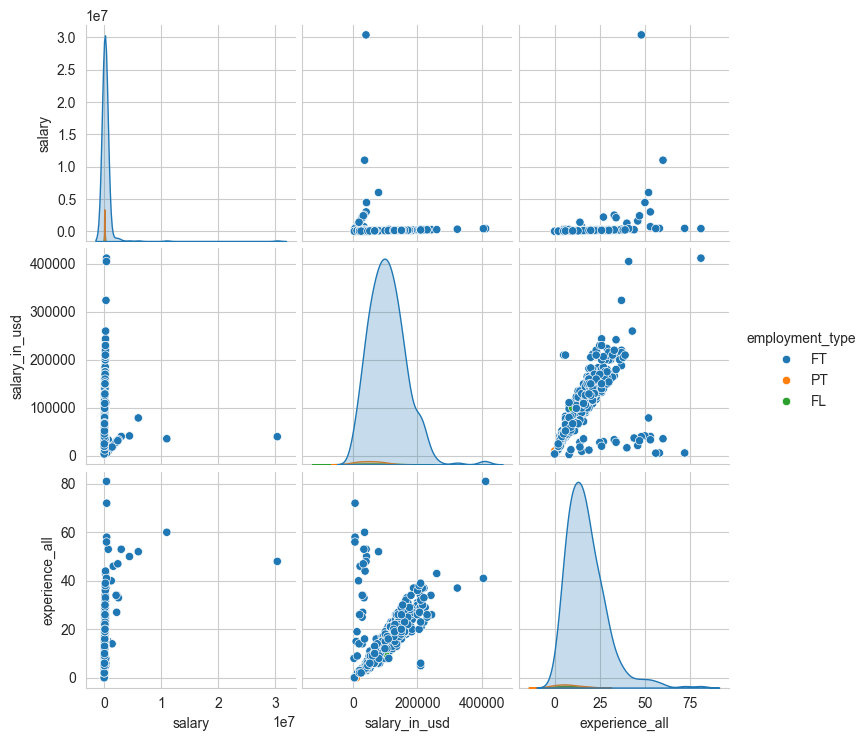

In [38]:
sns.pairplot(df[['salary', 'employment_type', 'salary_in_usd', 'experience_all']], hue = 'employment_type')

Судя по этим данным, зарплаты в долларах зависят напрямую от опыта, что логично. Странно, но видно, что зарплаты в долларах почти не зависят от зарплат в у.е. Так же можно заметить, что люди, не работающие на полную ставку, получают меньше зарплаты.

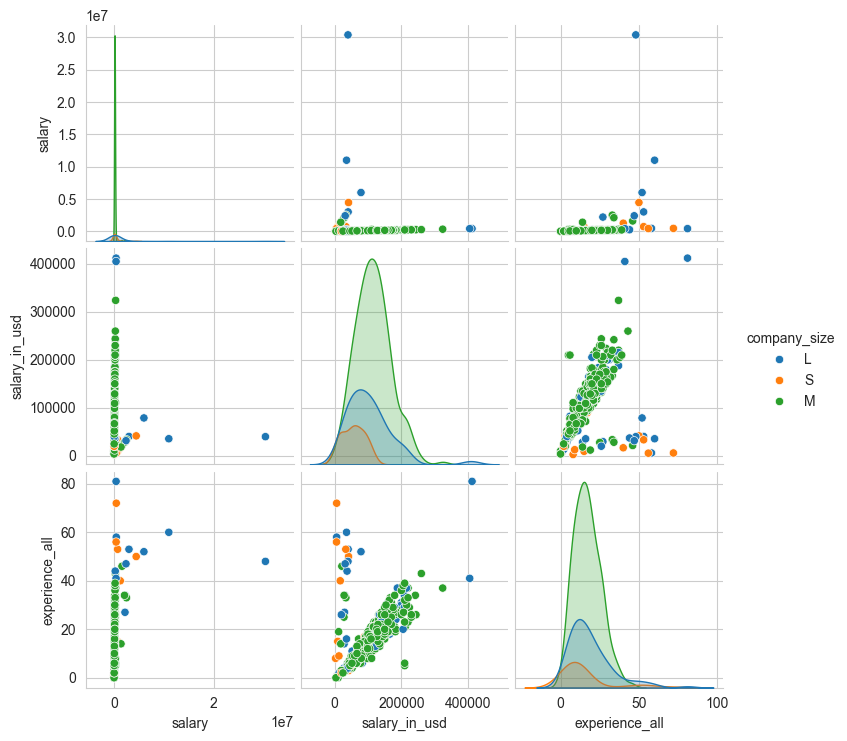

In [39]:
sns.pairplot(df[['salary', 'company_size', 'salary_in_usd', 'experience_all']], hue = 'company_size')

Из данного графика видно, что в средних компаниях зарплата в долларах выше, чем в маленьких и больших компаниях. При этом самая большая зарплата в долларах принадлежит человеку из большой компании. Большая часть работников находится в средних компаниях.

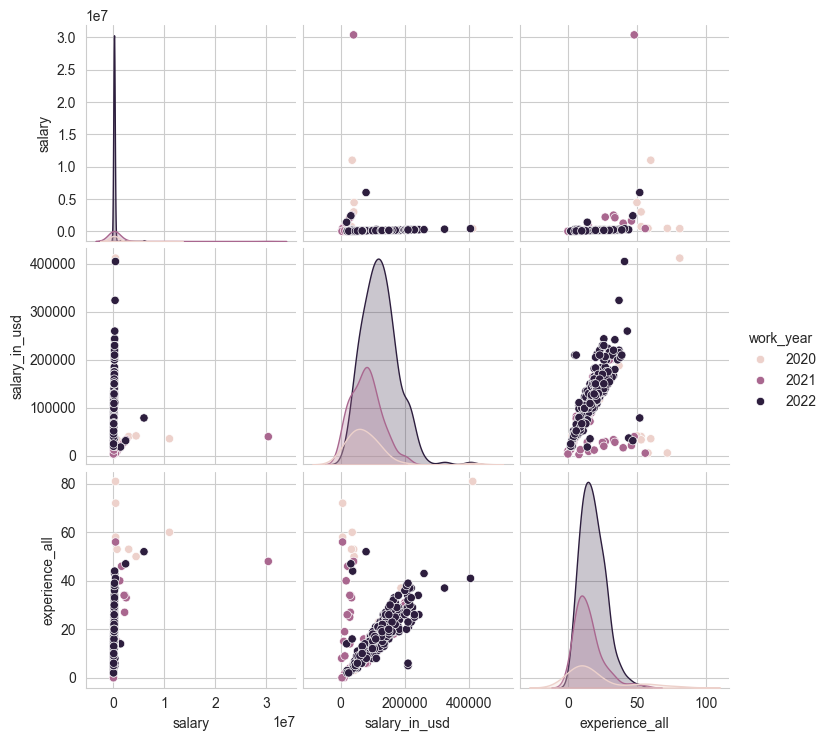

In [40]:
sns.pairplot(df[['salary', 'work_year', 'salary_in_usd', 'experience_all']], hue = 'work_year')

По данным графикам видно, что запрлаты в долларах зависят от опыта работы. Также видно, что зарплаты в долларах зависят от года работы и чем больше год, тем больше и зарплата. Однако самая большая зарплата в долларах принадлежит записи от 2020 года работы.

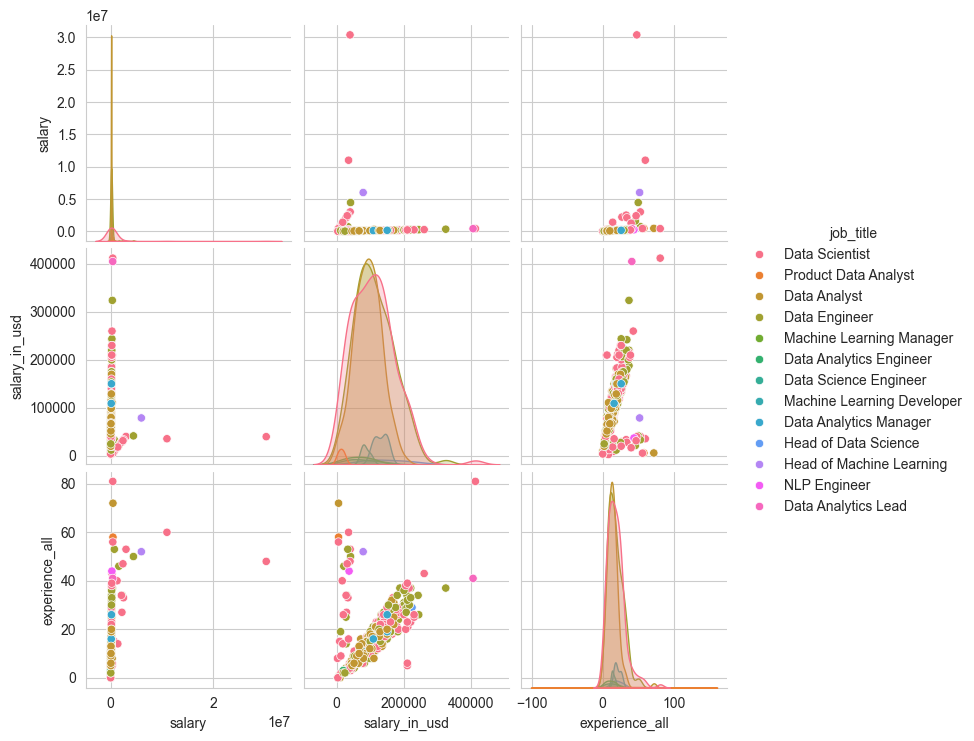

In [41]:
sns.pairplot(df[['salary', 'job_title', 'salary_in_usd', 'experience_all']], hue = 'job_title')

Из данного графика видно, что заплаты в долларах в зависимости от должности зарплата в долларах либо сильно выше средней, либо сильно ниже. Аналогичная ситуация с опытом работы. В зависимости от должности опыт работы либо сильно выше среднего, либо сильно ниже. 

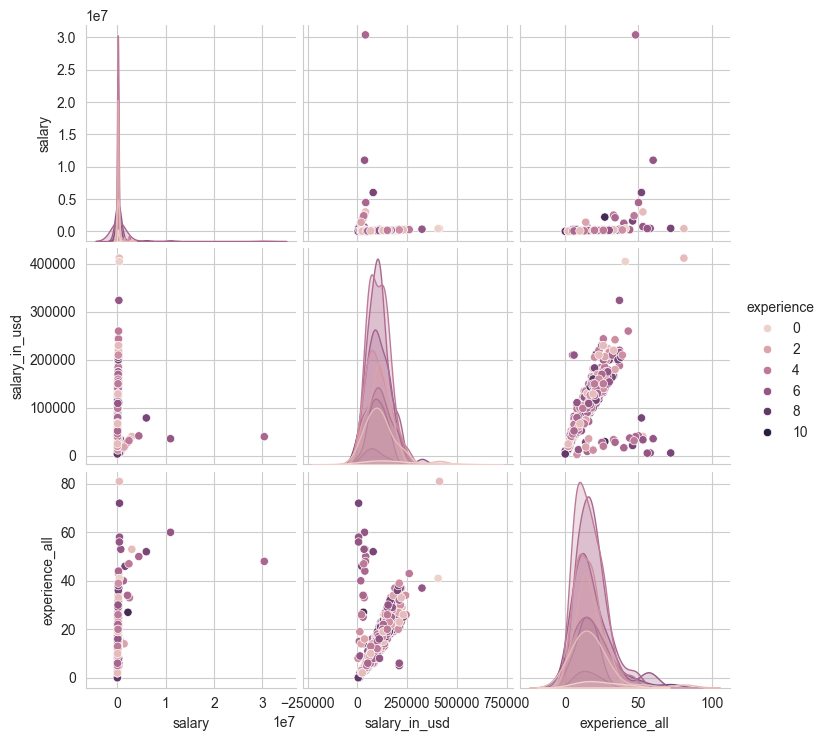

In [42]:
sns.pairplot(df[['salary', 'experience', 'salary_in_usd', 'experience_all']], hue = 'experience')

По таблице видно, что зарплата в долларах обратно зависима от опыта на текущем месте работы. Это может быть потому, что в IT-индустрии есть тенденция на получение повышения через смену компании. При этом зарплата в долларах зависит от общего опыта работы, что логично.

Вычисляется ковариация и корреляция.

In [43]:
df.cov(numeric_only=True)

,work_year,salary,salary_in_usd,experience_all,experience
work_year,0.459800,-1.086139e+05,1.315978e+04,2.280860e-01,-0.012874
salary,-108613.877207,2.791506e+12,-8.863534e+09,5.886774e+06,115068.115237
salary_in_usd,13159.775748,-8.863534e+09,3.385339e+09,3.212636e+05,-9263.656097
experience_all,0.228086,5.886774e+06,3.212636e+05,1.239536e+02,0.177974
experience,-0.012874,1.150681e+05,-9.263656e+03,1.779738e-01,4.065549


In [44]:
df.corr(numeric_only=True)

,work_year,salary,salary_in_usd,experience_all,experience
work_year,1.000000,-0.095870,0.333551,0.030212,-0.009416
salary,-0.095870,1.000000,-0.091177,0.316467,0.034157
salary_in_usd,0.333551,-0.091177,1.000000,0.495942,-0.078963
experience_all,0.030212,0.316467,0.495942,1.000000,0.007928
experience,-0.009416,0.034157,-0.078963,0.007928,1.000000


<Axes: >

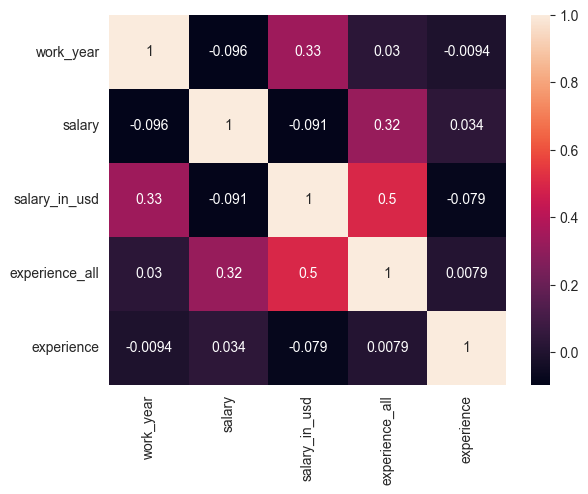

In [45]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

Исходя из данных по ковариации и корреляции видно, что зарплата обратно зависима от зарплаты в долларах. При этом со временем зарплата падает, а зарплата в долларах растет. Это может быть объяснено через дефляцию в странах. Так, получается, что реальные зарплаты растут, а номинальные не растут или даже падают.
Строгой корреляции между данными нет. Самая сильная корреляция: корреляция между общим опытом и зарплатой в долларах. Она равна 0.5. Это может быть объяснено тем, что чем больше опыт, тем больше зарплата.   

Выполняется задание номер 1.
Задание 1: Использовать seaborn. По группировке - work_year и количество компаний по различному типу занятости (employment_type).

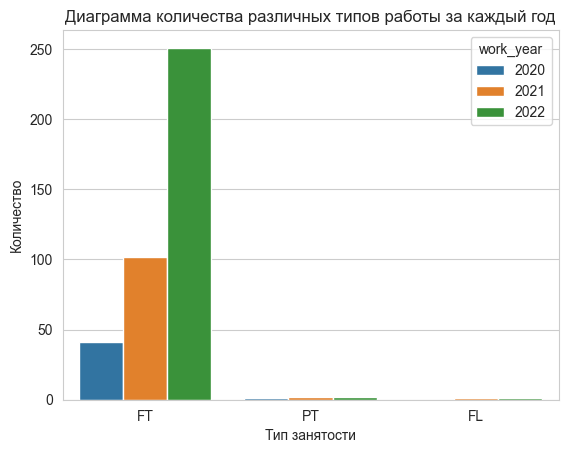

In [46]:
sns.countplot(hue= 'work_year', x= 'employment_type', data=df, palette='tab10')
plt.title('Диаграмма количества различных типов работы за каждый год')
plt.xlabel('Тип занятости')
plt.ylabel('Количество')
plt.show()

Из этих данных видно, что сотрудников в 2022 сильно больше, чем в другие года. Каждый год количество сотрудников в компаниях с разным типом занятости растет. При этом в любом году больше всего сотрудников работают на полную ставку. На фрилансе работают меньше всего сотрудников, а в 2020 году на фрилансе работало около 0 сотрудников. На парт-тайме работают примерно одинаковое количество сотрудников во всех годах, но в 2020, как и на фрилансе, работало около 0 сотрудников. 

Выполняется задание 2.  
Задание 2: Использовать pandas и plot. По сводной таблице (pivot_table) - отобразить среднюю зарплату в usd по локациям (company_location). Сделать линию зелёной, шириной 4 и отобразить маркеры в виде *.

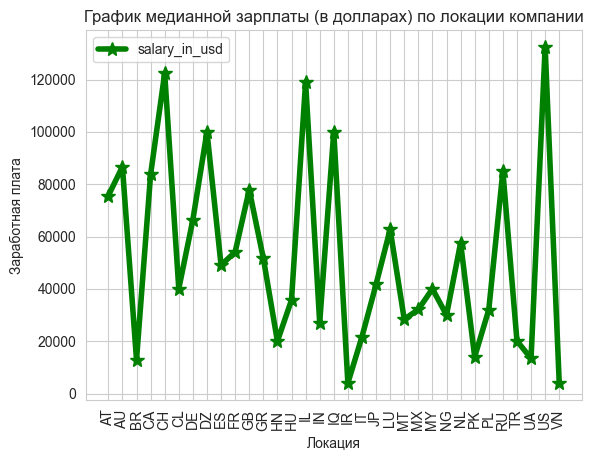

In [47]:
pivot_table = df.pivot_table(values='salary_in_usd', index='company_location', aggfunc='mean')

# Построение графика с зелёной линией и маркерами
pivot_table.plot(kind='line', color='green', linewidth=4, marker='*', markersize=10, rot=90)
plt.xticks(range(len(pivot_table.index)), pivot_table.index)
plt.title('График медианной зарплаты (в долларах) по локации компании')
plt.xlabel('Локация')
plt.ylabel('Заработная плата')
plt.grid(True)
plt.show()

Из графика видно, что:
- Самая высокая средняя зарплата в США (US).
- Высокие средние зарплаты также наблюдаются в Швейцарии (CH), Алжире (DZ) и Израиле (IL).
- Самая низкая средняя зарплата в Иране (IR) и Вьетнаме (VN).
- Зарплаты в долларах сильно варьируются в зависимости от локации компании.
- Страны с более развитой экономикой, как правило, предлагают более высокие зарплаты.
- В странах с менее развитой экономикой средние зарплаты значительно ниже.

Выполняется задание 3.  
Задание 3: Использовать matplotlib. Построить круговую диаграмму, которая отображает процент количества записей по каждому году.

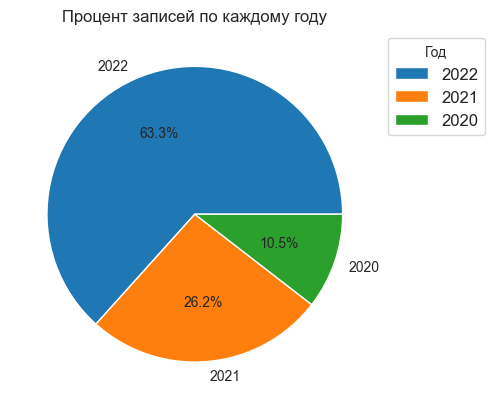

In [48]:
plt.pie(df['work_year'].value_counts(), autopct='%.1f%%',labels=df['work_year'].value_counts().index)
plt.title('Процент записей по каждому году')
plt.legend(title='Год', fontsize=12, bbox_to_anchor=(1, 1))
plt.show()

Из диаграммы видно:
- Наибольшее количество записей приходится на 2022 год, что составляет значительную часть всех данных.
- 2021 год также имеет значительное количество записей, но меньше, чем 2022 год.
- 2020 год имеет наименьшее количество записей по сравнению с другими годами.
- Количество записей увеличивается с каждым годом, что может свидетельствовать о росте числа сотрудников или увеличении количества данных, собираемых с течением времени.
- Наибольшее количество сотрудников было в 2022 году, что может указывать на рост компаний или увеличение найма сотрудников в этот период.
- Увеличение количества записей в 2021 и 2022 годах может быть связано с улучшением экономической ситуации или увеличением спроса на специалистов в данной области.

## Вывод


### Общий анализ данных
В ходе работы был проведен анализ данных о зарплатах и работах. Данные содержат информацию о годе работы, типе занятости, названии должности, зарплате в у.е. и в долларах, стране проживания работника, стране компании и размере компании. Были выполнены следующие шаги:
1. Загрузка и предварительный просмотр данных.
2. Преобразование типов данных для корректного анализа.
3. Заполнение пропусков в данных.
4. Проверка и исправление некорректных данных и дубликатов.
5. Построение различных графиков для визуализации данных.

### Заключение
Во время анализа данных были выявлены следующие тенденции: Зарплаты в долларах растут с увеличением общего опыта работы, но на текущем месте работы они обратно пропорциональны опыту на этом месте. Полная занятость (FT) приносит больше дохода, чем частичная (PT) или фриланс (FL), и большинство сотрудников работают на полную ставку. Высокие зарплаты наблюдаются в США, Швейцарии, Алжире и Израиле, а низкие — в Иране и Вьетнаме, что связано с экономическим развитием страны. В средних компаниях зарплаты выше, чем в маленьких и больших, хотя самая высокая зарплата зафиксирована в большой компании. Количество сотрудников и данные о зарплатах растут с каждым годом, с наибольшим количеством записей в 2022 году. Сильная корреляция (0.5) наблюдается между общим опытом и зарплатой в долларах, при этом зарплата в долларах обратно пропорциональна зарплате в у.е. Эти данные полезны для управления персоналом и планирования зарплат.